In [24]:
import pandas as pd
import numpy  as np

In [6]:
df = pd.read_csv('international-airline-passengers.csv', usecols = [1])
df

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [8]:
values = df.values.astype('float32')
values

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

In [11]:
training_size = int(values.shape[0] * 0.67)
training_size

96

In [13]:
testing_size = values.shape[0] - training_size
testing_size

48

In [16]:
train = values[:training_size]
test  = values[training_size:]

In [18]:
train.shape, test.shape

((96, 1), (48, 1))

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
train = scaler.fit_transform(train)
test  = scaler.transform(test)

In [22]:
def create_dataset(data, k):
    # k -> Window Size
    # 1, 2, 3, 4, 5, 6, k = 4
    # -----------------------
    # 1,2,3,4 -> 5
    # 2,3,4,5 -> 6
    
    # So we will have size_of_data - k, training data
    dataX, dataY = [], []
    for i in range(data.shape[0] - k):
        dataX.append(data[i:i+k, 0])
        dataY.append(data[i+k,   0])
    return np.array(dataX), np.array(dataY)

In [30]:
look_back = 12
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [33]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX  = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
trainX.shape

(84, 12, 1)

In [28]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

Using TensorFlow backend.


In [36]:
model = Sequential()
model.add(SimpleRNN(4, input_shape = (look_back, 1)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(trainX, trainY, epochs = 10, batch_size = 1)

Epoch 1/10
84/84 [==============================] - 3s 32ms/step - loss: 0.0293
Epoch 2/10
84/84 [==============================] - 1s 9ms/step - loss: 0.0140
Epoch 3/10
84/84 [==============================] - 1s 8ms/step - loss: 0.0109
Epoch 4/10
84/84 [==============================] - 1s 8ms/step - loss: 0.0093
Epoch 5/10
84/84 [==============================] - 1s 8ms/step - loss: 0.0077
Epoch 6/10
84/84 [==============================] - 1s 8ms/step - loss: 0.0076
Epoch 7/10
84/84 [==============================] - 1s 8ms/step - loss: 0.0065
Epoch 8/10
84/84 [==============================] - 1s 10ms/step - loss: 0.0062
Epoch 9/10
84/84 [==============================] - 1s 9ms/step - loss: 0.0061
Epoch 10/10
84/84 [==============================] - 1s 8ms/step - loss: 0.0061


In [39]:
testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict).ravel()

trainPredict = model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict).ravel()

testTrue = scaler.inverse_transform([testY]).ravel()
trainTrue = scaler.inverse_transform([trainY]).ravel()

In [40]:
import matplotlib.pyplot as plt

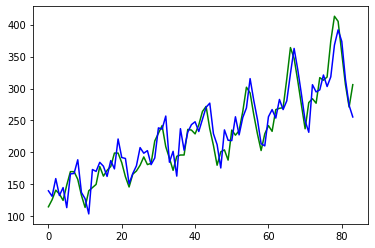

In [42]:
plt.plot(trainTrue, c = 'g')
plt.plot(trainPredict, c = 'b')
plt.show()

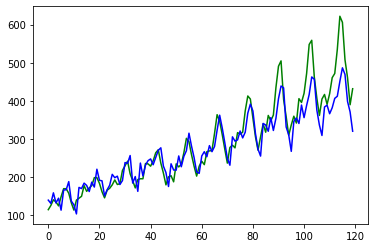

In [50]:
combinedPredicted = np.concatenate((trainPredict, testPredict))
combinedTrue = np.concatenate((trainTrue, testTrue))

plt.plot(combinedTrue, c = 'g')
plt.plot(combinedPredicted, c = 'b')
plt.show()